In [1]:
import numpy as np
import sympy as sym
import numpy.linalg as LA
from sympy import *
from sympy import oo, gamma
from IPython.display import display
from scipy import special
from matplotlib import pyplot as plt
init_printing(use_latex='mathjax')
x, y, z, t= symbols('x y z t')
r,theta, phi = symbols('r  theta  phi')
f, g, h = symbols('f g h', cls=Function)

Problem 1 Time estimate

In [46]:
e=0.05
display(ln(1/(pi*e))/pi**2)
display(np.float(ln(1/(pi*e))/pi**2))

   ⎛20.0⎞
log⎜────⎟
   ⎝ π  ⎠
─────────
     2   
    π    

0.18754575284702255

Integration schemes for problem 2

In [2]:
def fowardeuler(K,u0,dt,tf):
    t=np.arange(0,tf,dt)
    row,col=np.shape(K)
    u=[]
    I=np.eye(row)
    for i in t:
        u.append(u0)
        G=(I+dt*K)
        u0=G@u[-1]
    return u

In [3]:
def backwardeuler(K,u0,dt,tf):
    t=np.arange(0,tf,dt)
    row,col=np.shape(K)
    u=[]
    I=np.eye(row)
    for i in t:
        u.append(u0)
        G=(I-dt*K)
        G=LA.inv(G)
        u0=G@u[-1]
    return u

In [4]:
def trap(K,u0,dt,tf):
    t=np.arange(0,tf,dt)
    row,col=np.shape(K)
    u=[]
    I=np.eye(row)
    for i in t:
        u.append(u0)
        A=(I-0.5*dt*K)
        A=LA.inv(A)
        B=(I+0.5*dt*K)
        G=A@B
        u0=G@u[-1]
    return u

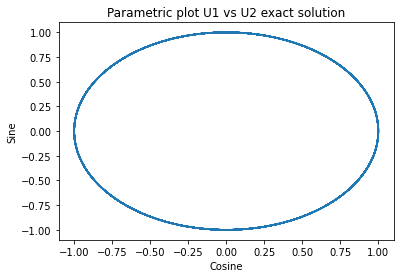

In [5]:
dt=0.1
tf=100   
t=np.arange(0,tf,dt)
plt.plot(np.cos(t),np.sin(t))
plt.xlabel('Cosine')
plt.ylabel('Sine')
plt.title('Parametric plot U1 vs U2 exact solution')
plt.show()

In [6]:
dt=0.1
tf=100   
t=np.arange(0,tf,dt)
K=np.array([[0,-1],[1,0]])
u0=np.array([1,0])
u=fowardeuler(K,u0,dt,tf)


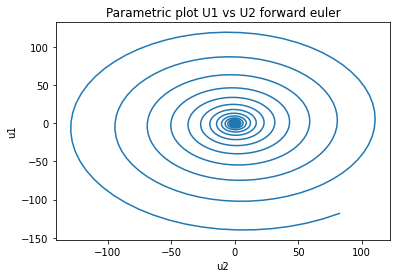

In [7]:
u=np.array(u)
plt.plot(u[:,0],u[:,1])
plt.xlabel('u2')
plt.ylabel('u1')
plt.title('Parametric plot U1 vs U2 forward euler')
plt.show()

In [8]:
dt=0.1
tf=100   
t=np.arange(0,tf,dt)
K=np.array([[0,-1],[1,0]])
u0=np.array([1,0])
u=backwardeuler(K,u0,dt,tf)


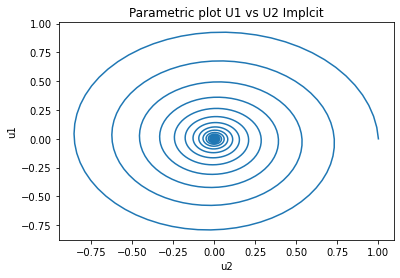

In [9]:
u=np.array(u)
plt.plot(u[:,0],u[:,1])
plt.xlabel('u2')
plt.ylabel('u1')
plt.title('Parametric plot U1 vs U2 Implcit')
plt.show()

In [10]:
dt=0.1
tf=100   
t=np.arange(0,tf,dt)
K=np.array([[0,-1],[1,0]])
u0=np.array([1,0])
u=trap(K,u0,dt,tf)


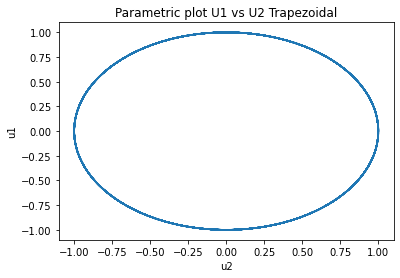

In [11]:
u=np.array(u)
plt.plot(u[:,0],u[:,1])
plt.xlabel('u2')
plt.ylabel('u1')
plt.title('Parametric plot U1 vs U2 Trapezoidal')
plt.show()

eigen values of foward euler 

In [52]:
I=sym.eye(2)
K=Matrix([[0,-1],[1,0]])
dt=symbols('Delta',real=True)
Geuler=(I+dt*K)
Gimplicit=(I-dt*K)
Gimplicit=Gimplicit.inv()
A=(I-0.5*dt*K)
A=A.inv()
B=(I+0.5*dt*K)
Gtrap=A*B


In [25]:

display("Euler eigen values")
display(Geuler.eigenvals())

display("Euler implicit eigen values")
display(Gimplicit.eigenvals())

display("Trapezoidal eigen values")
display(Gtrap.eigenvals())



'Euler eigen values'

{-ⅈ⋅Δ + 1: 1, ⅈ⋅Δ + 1: 1}

'Euler implicit eigen values'

⎧   ⅈ⋅Δ       1         ⅈ⋅Δ       1      ⎫
⎪- ────── + ──────: 1, ────── + ──────: 1⎪
⎨   2        2          2        2       ⎬
⎪  Δ  + 1   Δ  + 1     Δ  + 1   Δ  + 1   ⎪
⎩                                        ⎭

'Trapezoidal eigen values'

⎧  4⋅ⅈ⋅Δ    (Δ - 2)⋅(Δ + 2)     4⋅ⅈ⋅Δ    (Δ - 2)⋅(Δ + 2)   ⎫
⎪- ────── - ───────────────: 1, ────── - ───────────────: 1⎪
⎨   2             2              2             2           ⎬
⎪  Δ  + 4        Δ  + 4         Δ  + 4        Δ  + 4       ⎪
⎩                                                          ⎭

In [57]:
x,y=Gtrap.eigenvals()
magnitude=(re(x)**2+im(x)**2)**0.5
display(magnitude)
display(magnitude.subs(dt,0.5))

                               0.5
⎛      2            2        2⎞   
⎜  16⋅Δ      (Δ - 2) ⋅(Δ + 2) ⎟   
⎜───────── + ─────────────────⎟   
⎜        2               2    ⎟   
⎜⎛ 2    ⎞        ⎛ 2    ⎞     ⎟   
⎝⎝Δ  + 4⎠        ⎝Δ  + 4⎠     ⎠   

1.00000000000000

Question 3

In [63]:
I=sym.eye(3)
dt=symbols('Delta',real=True)
h=symbols('h',real=True)
K=Matrix([[-2,1,0],[1,-2,1],[0,1,-2]])
K=(1/(h**2))*K
Geuler3=(I+dt*K)
display("Euler eigen values question 3 ")
display(Geuler3.eigenvals())


'Euler eigen values question 3 '

⎧        2                    2                    2   ⎫
⎪-2⋅Δ + h      -2⋅Δ - √2⋅Δ + h      -2⋅Δ + √2⋅Δ + h    ⎪
⎨─────────: 1, ────────────────: 1, ────────────────: 1⎬
⎪     2                2                    2          ⎪
⎩    h                h                    h           ⎭

In [62]:
e1,e2,e3=Geuler3.eigenvals()
display(e1.subs(dt,1))
display(e2.subs(dt,1))
display(e3.subs(dt,1))

-1

-√2 - 1

-1 + √2